In [0]:
# import the libraries
import tensorflow as tf
import numpy as np

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# split the data into train , test and validation sets
X_train = mnist.train.images

In [0]:
y_train = mnist.train.labels

In [0]:
X_test = mnist.test.images

In [0]:
y_test = mnist.test.labels

In [0]:
X_validation = mnist.validation.images

In [0]:
y_validation = mnist.validation.labels

In [13]:
# check the data
X_test.shape

(10000, 28, 28, 1)

In [14]:
X_test[0].shape

(28, 28, 1)

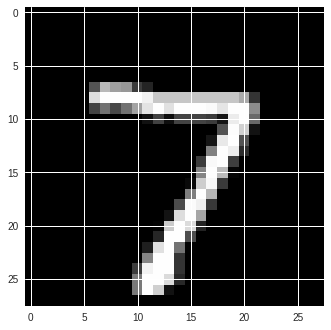

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].squeeze() , cmap='gray')
# the squeeze function converts the (28,28,1) ---> (28,28)

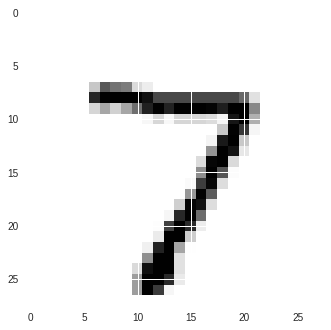

In [22]:
#slightly different way of doing the same is
plt.imshow(np.squeeze(X_test[0]))

In [0]:
#pad the image so that the image becomes (28,28,1)---> (32,32,1)
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [24]:
X_train.shape

(55000, 32, 32, 1)

In [0]:
#similarly change the shape of the test and validation set
X_test = np.pad(X_test , ((0,0),(2,2),(2,2),(0,0)),'constant')
X_validation=np.pad(X_validation , ((0,0),(2,2),(2,2),(0,0)),'constant')

In [27]:
print(X_test.shape)
print(X_validation.shape)

(10000, 32, 32, 1)
(5000, 32, 32, 1)


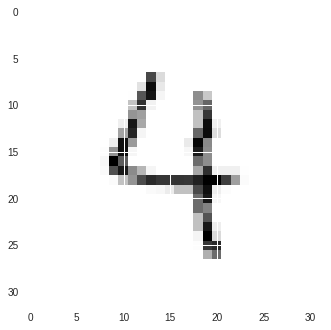

In [29]:
# see the data once again
plt.imshow(X_test[24].squeeze())

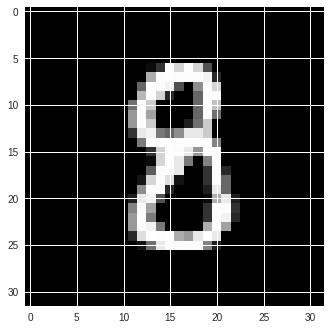

In [30]:
plt.imshow(X_validation[1254].squeeze() , cmap ='gray')

In [0]:
# Preprocess the data
from sklearn.utils import shuffle

In [0]:
X_train , y_train = shuffle(X_train ,y_train)

In [0]:
#batch size 
BATCH_SIZE = 128
EPOCHS = 10


# Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

# Architecture
Layer 1: Convolutional. The output shape   28x28x6. **(padding ='valid')**

Activation.  activation function (relu /sigmoid/tanh)

Pooling. The output shape would  be 14x14x6.

Layer 2: Convolutional. The output shape would be 10x10x16.** (padding ='valid')**

Activation. activation function (**relu** /sigmoid/tanh)

Pooling. The output shape would be 5x5x16.

Flatten. Flattens the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using **tf.contrib.layers.flatten**

Layer 3: Fully Connected. This has 120 outputs.

Activation. activation function (**relu** /sigmoid/tanh)

Layer 4: Fully Connected. This would have 84 outputs.

Activation.  activation function (**relu** /sigmoid/tanh)

Layer 5: Fully Connected (Logits). This should have 10 outputs and we use **softmax** for it.

# Output
Return the result of the 2nd fully connected layer.

In [0]:
from tensorflow.contrib.layers import flatten


In [0]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. ==> use padding 'VALID'
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.constant(.1, tf.float32,[6]))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    #Activation == > relu
    conv1 = tf.nn.relu(conv1)
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.constant(0.1, tf.float32, [16]))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    #Activation ===> relu
    conv2 = tf.nn.relu(conv2)
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    #Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    #Activation ==> relu
    fc1 = tf.nn.relu(fc1)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.constant(0.1, tf.float32, [84]))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # Activation ===>relu
    fc2 = tf.nn.relu(fc2)
    #Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.constant(0.1, tf.float32, [10]))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [0]:
# Create the Placeholder
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

# Training 

In [0]:
lr = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)

# Evaluation

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        test_accuracy = evaluate(X_test , y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    #saver.save(sess, 'lenet')
    #print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.969
EPOCH 1 ...
Test Accuracy = 0.968

EPOCH 2 ...
Validation Accuracy = 0.982
EPOCH 2 ...
Test Accuracy = 0.983

EPOCH 3 ...
Validation Accuracy = 0.984
EPOCH 3 ...
Test Accuracy = 0.985

EPOCH 4 ...
Validation Accuracy = 0.986
EPOCH 4 ...
Test Accuracy = 0.987

EPOCH 5 ...
Validation Accuracy = 0.986
EPOCH 5 ...
Test Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.987
EPOCH 6 ...
Test Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.988
EPOCH 7 ...
Test Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.987
EPOCH 8 ...
Test Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.986
EPOCH 9 ...
Test Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.989
EPOCH 10 ...
Test Accuracy = 0.988



In [0]:
'''with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))'''